# Librairies 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from io import BytesIO

# Importation de jeu de données

In [3]:
data = pd.read_parquet("hf://datasets/DBQ/Chanel.Product.prices.Germany/data/train-00000-of-00001-d681c47b79d4401f.parquet")

c:\Users\Slash\Desktop\M2\embadding\Projetfinale\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
data.head(3)

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4152B13455,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://www.chanel.com/de/mode/p/AS4152B13455N...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0,5200.0,5200.0,5200.0,0
1,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PA67085Y09953,n.a.,https://www.chanel.com/de/mode/p/A67085Y099539...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0,5750.0,5750.0,5750.0,0
2,Chanel,2023-11-17,DEU,EUR,CHANEL,EYEWEAR,BLUE LIGHT GLASSES,N.A.,PA71441,Schwarz,https://www.chanel.com/de/brillen/p/A71441X081...,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0,420.0,420.0,420.0,0


In [11]:
data.shape

(1428, 17)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

In [13]:
data.describe()

,full_price,price,full_price_eur,price_eur,flg_discount
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.0
mean,6076.253725,6076.253725,6076.253725,6076.253725,0.0
std,15219.005999,15219.005999,15219.005999,15219.005999,0.0
min,23.000000,23.000000,23.000000,23.000000,0.0
25%,195.000000,195.000000,195.000000,195.000000,0.0
50%,1415.000000,1415.000000,1415.000000,1415.000000,0.0
75%,5800.000000,5800.000000,5800.000000,5800.000000,0.0
max,142000.000000,142000.000000,142000.000000,142000.000000,0.0


In [14]:
data.isnull().sum()

website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64

In [15]:
data['country_code'].unique(),data['competence_date'].unique(),data['website_name'].unique() ,data.brand.unique()

(array(['DEU'], dtype=object),
 array(['2023-11-17'], dtype=object),
 array(['Chanel'], dtype=object),
 array(['CHANEL'], dtype=object))

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data["category2_code"].value_counts()

category2_code
READY-TO-WEAR                  243
COSTUME JEWELRY                127
SUNGLASSES                      99
WOMEN                           88
WATCHES                         87
MEN                             72
HANDBAGS                        61
COCO CRUSH                      54
SHOES                           42
FACE                            41
EYEGLASSES                      40
SMALL LEATHER GOODS             38
BATH AND BODY                   36
EYES                            35
MOISTURIZERS                    35
RINGS                           35
NECKLACES                       30
BRUSHES AND ACCESSORIES         26
EARRINGS                        26
BLUE LIGHT GLASSES              24
LIPS                            21
N°5                             15
EXCEPTIONAL PIECES              11
CLEANSERS & MAKEUP REMOVERS     11
TONERS & LOTIONS                11
BELTS                           10
BRACELETS                        9
OILS                             9
HEADW

# Exploration initiale :

***Distribution des catégories (category2_code), des prix, et longueur des
descriptions (title)***

In [18]:
data[['category2_code','title','imageurl','price']]

,category2_code,title,imageurl,price
0,HANDBAGS,Tweed & goldfarbenes Metall Schwarz Rosa & B...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5200.0
1,HANDBAGS,n.a.,https://res.cloudinary.com/dwayrkp5z/image/fet...,5750.0
2,BLUE LIGHT GLASSES,Schwarz,https://res.cloudinary.com/dwayrkp5z/image/fet...,420.0
3,SUNGLASSES,Silberfarben. Gläser: Braun Mit Verlauf,https://res.cloudinary.com/dwayrkp5z/image/fet...,580.0
4,SUNGLASSES,Blau & Rosa. Gläser: Grau Mit Verlauf,https://res.cloudinary.com/dwayrkp5z/image/fet...,480.0
...,...,...,...,...
1423,BRUSHES AND ACCESSORIES,PRÄZISER PUDER-PINSEL,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0
1424,MOISTURIZERS,REICHHALTIGKEIT - SCHUTZ - AUFHELLENDE WIRKUNG,https://res.cloudinary.com/dwayrkp5z/image/fet...,49.0
1425,TONERS & LOTIONS,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0
1426,N°5,18 Karat BEIGEGOLD Diamanten,https://res.cloudinary.com/dwayrkp5z/image/fet...,3550.0


In [19]:
data.category2_code.unique()

array(['HANDBAGS', 'BLUE LIGHT GLASSES', 'SUNGLASSES', 'RINGS',
       'COCO CRUSH', 'EYEGLASSES', 'BRACELETS', 'NECKLACES', 'EARRINGS',
       'SHOES', 'SMALL LEATHER GOODS', 'BELTS', 'OTHER ACCESSORIES',
       'SCARVES', 'COSTUME JEWELRY', 'CAMELLIAS', 'FACE', 'WOMEN',
       'BATH AND BODY', 'MEN', 'BROOCHES', 'HEADWEAR', 'COMETE', 'N°5',
       'NAILS', 'EYES', 'WATCHES', 'READY-TO-WEAR', 'EYE & LIP CARE',
       'MASKS & EXFOLIATORS', 'CLEANSERS & MAKEUP REMOVERS',
       'MOISTURIZERS', 'SERUMS', 'BRUSHES AND ACCESSORIES', 'MISTS',
       'LIPS', '1932 COLLECTION (2022)', 'SUN PROTECTION', 'OILS',
       'EXCEPTIONAL PIECES', 'LES EXCLUSIFS DE CHANEL',
       'SOUS LE SIGNE DU LION HJ', 'N°5 COLLECTION', "L'ESPRIT DU LION",
       'SETS', 'TONERS & LOTIONS', 'MASSAGE ACCESSORIES',
       'LES INTEMPORELS DE CHANEL', '1.5 1 CAMELIA. 5 ALLURES',
       'BOY DE CHANEL', 'BODY'], dtype=object)

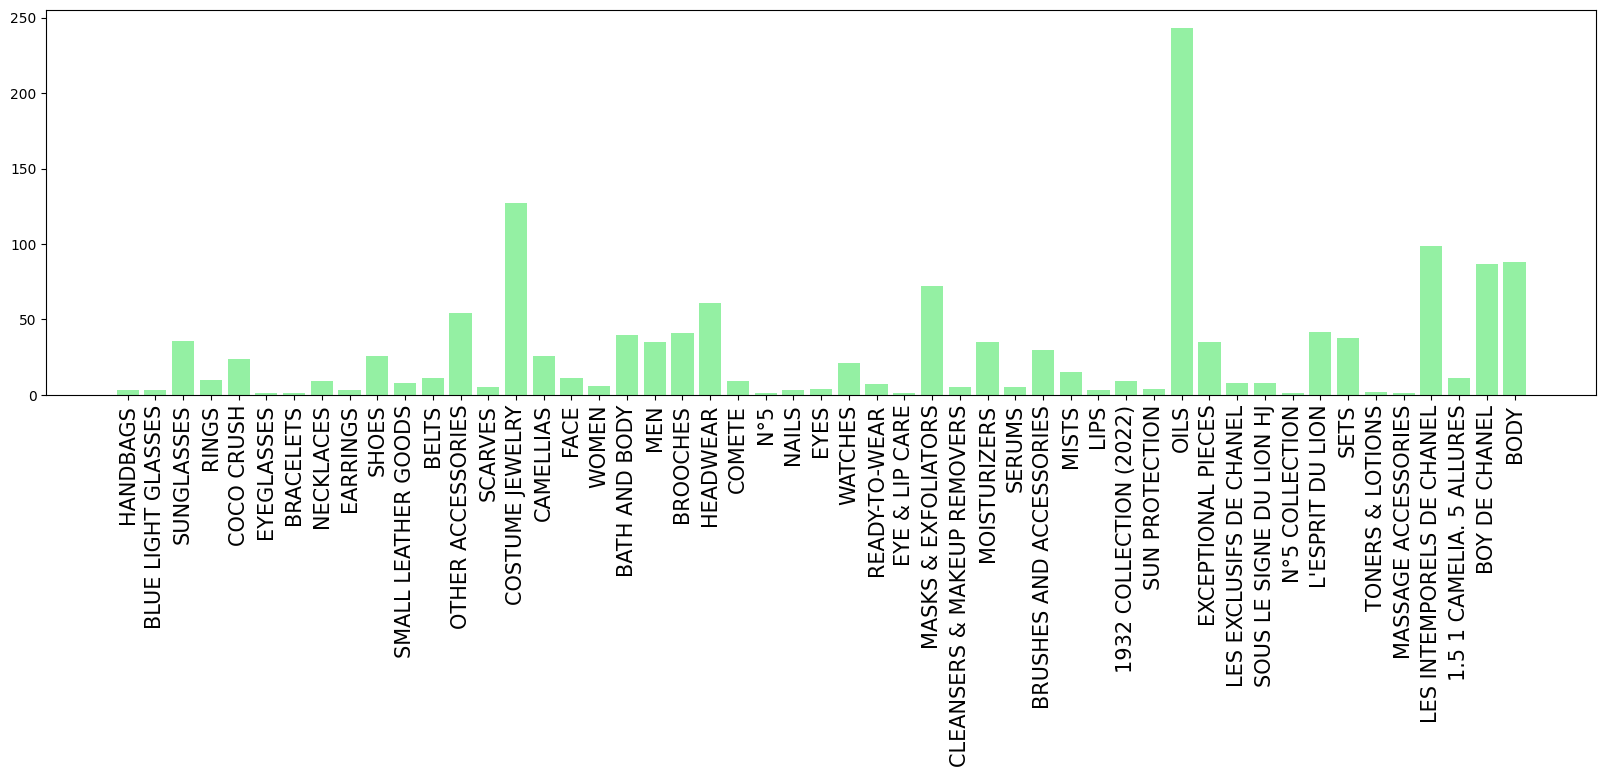

In [20]:
import numpy as np

plt.figure(figsize=(20,5))
item, count = np.unique(data['category2_code'], return_counts=True)
names = data.category2_code.unique()
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.9,0.4,0.6) )

plt.xticks(y_pos, names, fontsize=15, rotation=90)

plt.show()

Text(0.5, 1.0, 'Top 15 des prix moyens par catégorie')

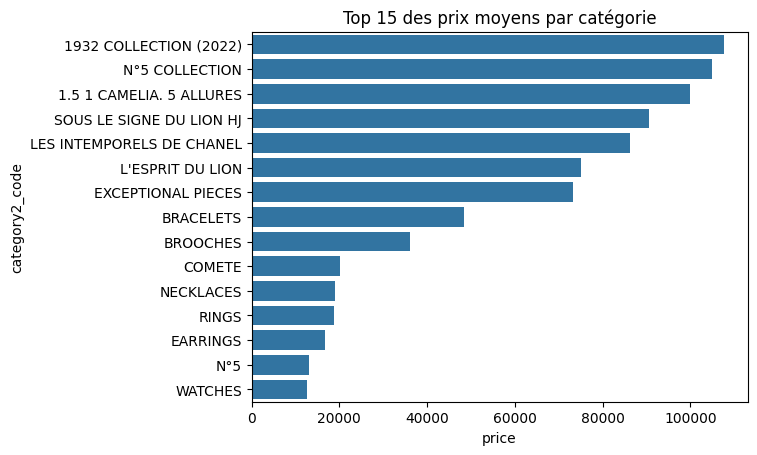

In [21]:
price_by_category = data.groupby('category2_code')['price'].mean()

sns.barplot(price_by_category.sort_values(ascending=False).head(15),orient='h')
plt.title("Top 15 des prix moyens par catégorie")


Text(0.5, 1.0, 'Top 10 des prix plus cher par catégorie')

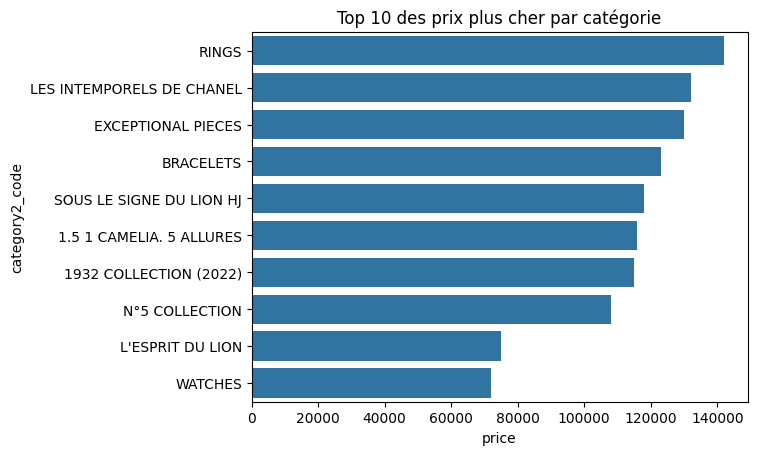

In [22]:
sns.barplot(data.groupby('category2_code')['price'].max().sort_values(ascending=False).head(10),orient='h')
plt.title("Top 10 des prix plus cher par catégorie")


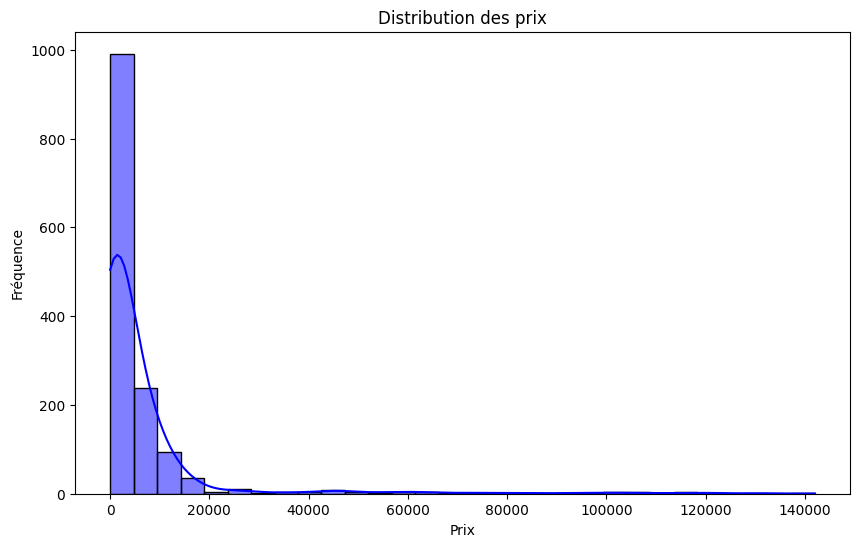

In [23]:
# 2. Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

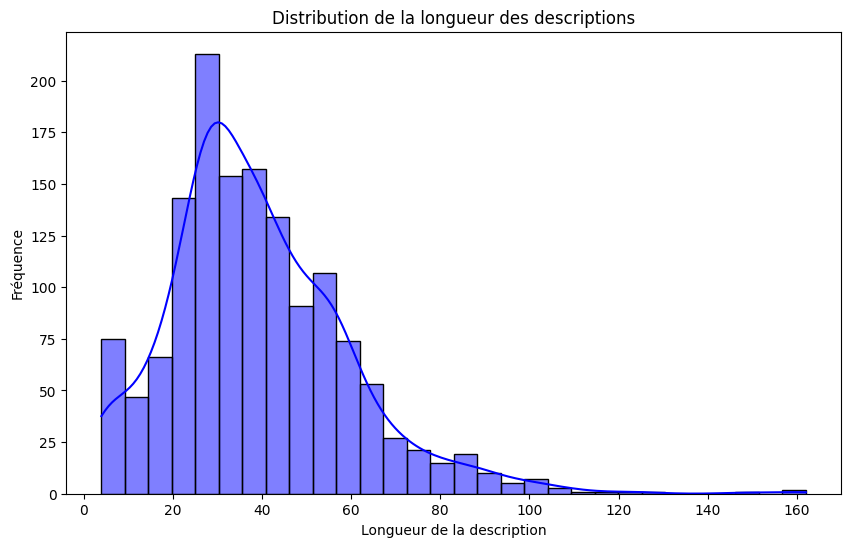

In [24]:
#  Longueur des descriptions (title)
data['title_length'] = data['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['title_length'], kde=True, bins=30, color='blue')
plt.title('Distribution de la longueur des descriptions')
plt.xlabel('Longueur de la description')
plt.ylabel('Fréquence')
plt.show()

<Axes: >

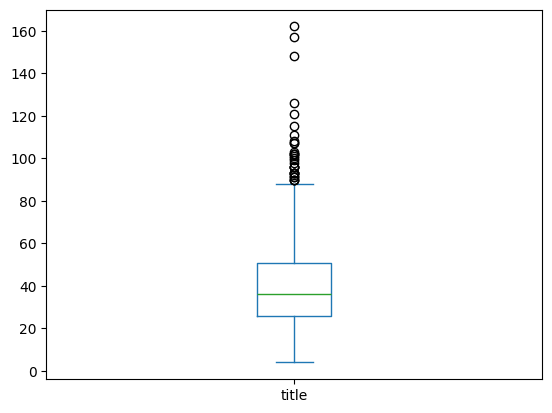

In [25]:
data.title.str.len().plot.box()

In [26]:
# voir si price c'est le meme que full_price
(data['price']==data['full_price']).value_counts()

True    1428
Name: count, dtype: int64

In [27]:
print(f"y {data['flg_discount'].unique()[0]} discount par catégorie")

y 0 discount par catégorie


***Analyse de la qualité et de la diversité des images (dimensions, couleurs,
formats).***

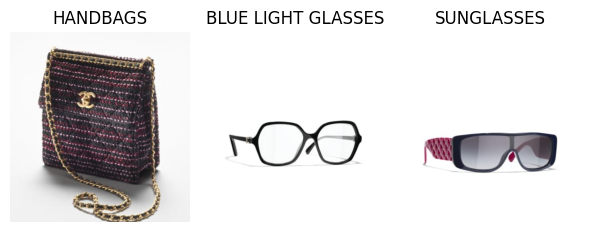

In [28]:
import requests

fig= plt.figure(figsize=(6,6))
# display quelques images  
for i, index in enumerate(range(0, 6,2)):  
    ax = fig.add_subplot(2, 3, i+1)  
    ax.axis('off')  
    
    response = requests.get(data.iloc[index]['imageurl'])
    img = Image.open(BytesIO(response.content))
    
    ax.imshow(img)
    ax.set_title(f"{data.iloc[index]['category2_code']}")  

plt.tight_layout()
plt.show()

In [29]:
from PIL import Image, UnidentifiedImageError

url_non_valides = []
images_info=[]
for i in range(len(data)):
    try:
        response = requests.get(data.iloc[i]['imageurl'], timeout=5)
        response.raise_for_status() 
        
        img = Image.open(BytesIO(response.content))
        width, height = img.size
        img_format = img.format
        mode = img.mode  

        images_info.append({'index': i, 'width': width, 'height': height, 'format': img_format,'mode':mode})

    except (requests.exceptions.RequestException, UnidentifiedImageError) as e:
            url_non_valides.append(i)


    

In [30]:
print(f"Nombre de url non valide dans cette base de donnees est {len(url_non_valides)}\nle nombre des url valides est {len(images_info)}")

Nombre de url non valide dans cette base de donnees est 234
le nombre des url valides est 1194


In [31]:
data = data.drop(index=url_non_valides)
data = data.reset_index(drop=True)

***Identification des biais éventuels dans le dataset, comme la surreprésentation de certaines catégories.***

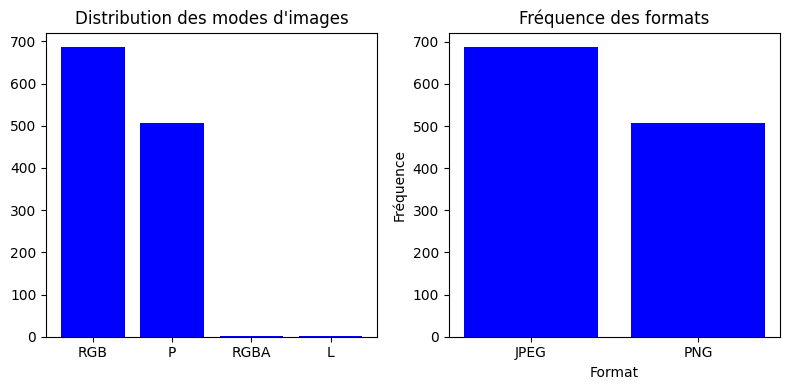

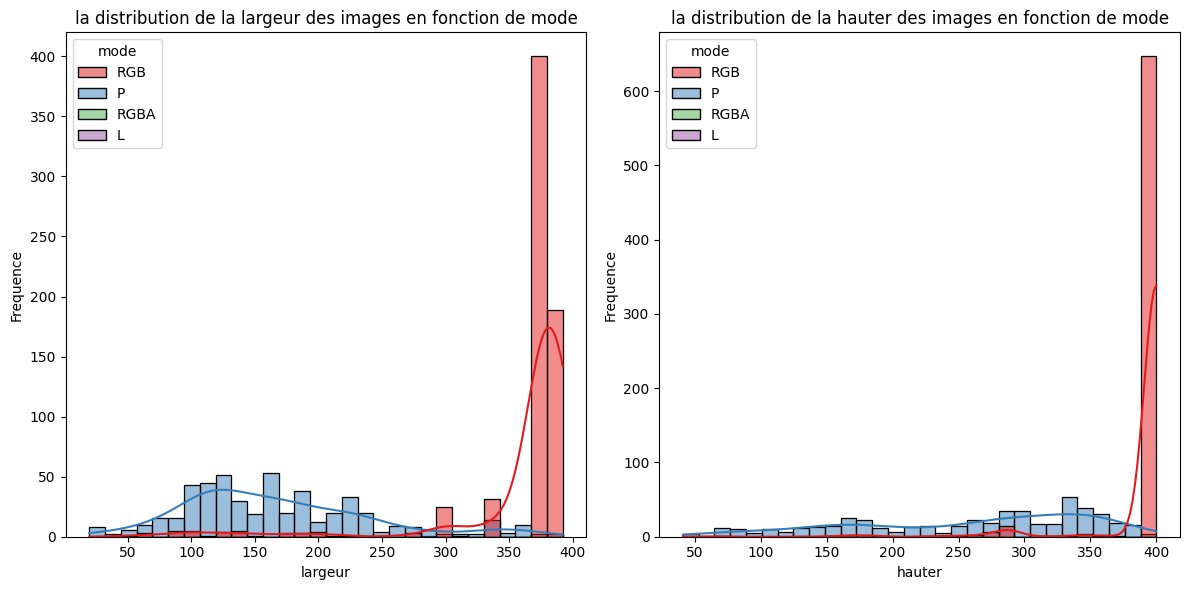

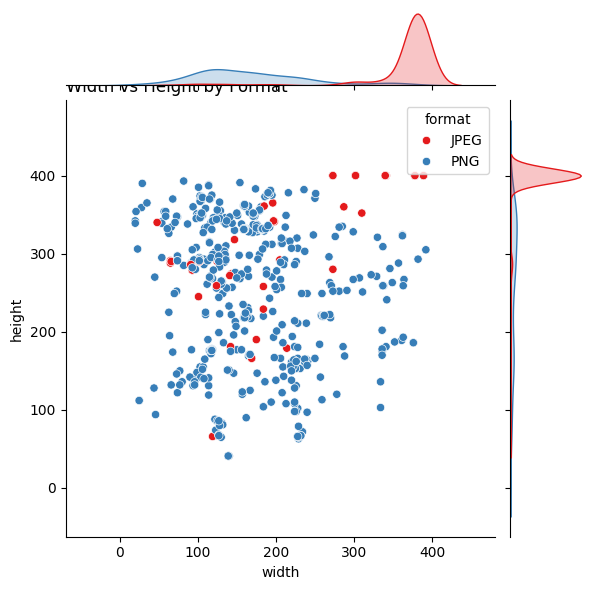

In [32]:
df = pd.DataFrame(images_info)


format_counts = df['format'].value_counts()
mode_count =df['mode'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(8, 4))  
ax[0].bar(mode_count.index, mode_count.values, color='blue')
ax[0].set_title('Distribution des modes d\'images')

ax[1].bar(format_counts.index, format_counts.values, color='blue')
ax[1].set_title('Fréquence des formats')
ax[1].set_xlabel('Format')
ax[1].set_ylabel('Fréquence')
plt.tight_layout()

plt.show()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df, x='width', hue='mode', bins=30, kde=True, palette='Set1')
plt.title('la distribution de la largeur des images en fonction de mode')
plt.xlabel('largeur')
plt.ylabel('Frequence')

plt.subplot(1, 2, 2)
sns.histplot(df, x='height', hue='mode', bins=30, kde=True, palette='Set1')
plt.title('la distribution de la hauter des images en fonction de mode')
plt.xlabel('hauter')
plt.ylabel('Frequence')

plt.tight_layout()
plt.show()

sns.jointplot(
    data=df,
    x='width',
    y='height',
    hue='format',
    kind='scatter',
    palette='Set1'
)
plt.title('Width vs Height by Format', loc='left')
plt.show()


# Préparation des données :


Les images de ce dataset sont représentées dans l'un des quatre **modes de couleur** :

1. **RGB** : Composé de trois canaux (Rouge, Vert, Bleu),
2. **L** : Mode en niveaux de gris, où chaque pixel est codé uniquement par sa luminosité (pas de couleur).
3. **RGBA**  : Semblable à RGB, mais avec un canal supplémentaire pour gérer  la luminance.
4. **P** : Mode de couleurs indexées, où les pixels pointent vers une palette de couleurs définie, ce qui est plus économique pour des images avec peu de couleurs.

durant l'étape de **prétraitement** il faut uniformiser toutes les images en mode RGB.

***Telechargement des images***

In [33]:
len(data['category2_code'].unique())

49

In [34]:
import os
base_dir = '../Data/data_avant_modifs'
path_output= '../Data/data_augmentation'

os.makedirs(base_dir, exist_ok=True)
os.makedirs(path_output, exist_ok=True)

for category in data['category2_code'].unique():
    category_dir = os.path.join(base_dir, category)
    os.makedirs(category_dir, exist_ok=True)


In [ ]:
def save_image(row):
    url = row['imageurl']
    category = row['category2_code']
    save_dir = os.path.join(base_dir, category)
    
    response = requests.get(url, timeout=10)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    if img.mode == 'P' or img.info.get('transparency', None) is not None:
        img = img.convert('RGBA')  # le P contiens la canal transparency donc il faut le gener avec RBGA mode ensuite le supprimer en le convertant en RGB 
        img = img.convert('RGB')   
    else:
         img = img.convert('RGB') 
    # if img.format =='PNG':
    #   filename = f"{row.name}.png"
    # else:
    img = img.resize((256, 256))

    img_array = np.array(img) / 255.0  
    img_normalized = Image.fromarray((img_array * 255).astype('uint8'))
    filename = f"{row.name}.jpg"
    filepath = os.path.join(save_dir, filename)
    img_normalized.save(filepath)


data.apply(save_image, axis=1)



c:\Users\Slash\Desktop\M2\embadding\Projetfinale\env\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


0       None
1       None
2       None
3       None
4       None
        ... 
1189    None
1190    None
1191    None
1192    None
1193    None
Length: 1194, dtype: object

In [36]:

from pathlib import Path

def count_images_in_folder(folder_path):
    try:
        files = os.listdir(folder_path)

        num_images = len([file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))])
        if num_images is not None:
                print(f"Number of images in '{folder_path}': {num_images}")
        else:
                print("Failed to count images.")
    except Exception as e:
        print(f"An error occurred: {e}")


folders = [f.name for f in Path(base_dir).iterdir() if f.is_dir()]

for folder in folders:
    category_dir = os.path.join(base_dir, folder)
    count_images_in_folder(category_dir)

Number of images in '../Data/data_avant_modifs\1.5 1 CAMELIA. 5 ALLURES': 2
Number of images in '../Data/data_avant_modifs\1932 COLLECTION (2022)': 1
Number of images in '../Data/data_avant_modifs\BATH AND BODY': 33
Number of images in '../Data/data_avant_modifs\BELTS': 7
Number of images in '../Data/data_avant_modifs\BLUE LIGHT GLASSES': 24
Number of images in '../Data/data_avant_modifs\BODY': 1
Number of images in '../Data/data_avant_modifs\BOY DE CHANEL': 1
Number of images in '../Data/data_avant_modifs\BRACELETS': 8
Number of images in '../Data/data_avant_modifs\BROOCHES': 2
Number of images in '../Data/data_avant_modifs\BRUSHES AND ACCESSORIES': 26
Number of images in '../Data/data_avant_modifs\CAMELLIAS': 4
Number of images in '../Data/data_avant_modifs\CLEANSERS & MAKEUP REMOVERS': 9
Number of images in '../Data/data_avant_modifs\COCO CRUSH': 34
Number of images in '../Data/data_avant_modifs\COMETE': 3
Number of images in '../Data/data_avant_modifs\COSTUME JEWELRY': 124
Number o

***1. Prétraitement des images***

In [37]:
len(folders)

49

In [38]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


image_size = 224 # si ca ne marche pas 384*384 (a expliquer dans le rapport)

parameters = dict(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

target_count = 200  

def augmentation_data(dataset_folder=base_dir, output_folder=path_output, target_count=target_count, parameters=parameters, output_format="jpg"):
   
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    datagen = ImageDataGenerator(**parameters)

    for category in os.listdir(dataset_folder):
        category_path = os.path.join(dataset_folder, category)
        output_category_path = os.path.join(output_folder, category)

        if not os.path.isdir(category_path):
            continue  

        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        existing_images = os.listdir(category_path)
        existing_count = len(existing_images)

        to_generate = target_count - existing_count

        if to_generate <= 0:
            continue


        for filename in existing_images:
            input_path = os.path.join(category_path, filename)
            output_path = os.path.join(output_category_path, filename)
            
            try:
                img = load_img(input_path, target_size=(image_size, image_size)) 
                img.save(output_path)
                img_array = img_to_array(img)
                img_array = img_array.reshape((1,) + img_array.shape)

                augmented_images = datagen.flow(img_array, batch_size=1)

                for i, batch in enumerate(augmented_images):
                    augmented_image = array_to_img(batch[0].astype('uint8'))
                    output_name = f"{filename}_aug_{i}.{output_format}"
                    output_path = os.path.join(output_category_path, output_name)
                    augmented_image.save(output_path)

                    to_generate -= 1
                    if to_generate <= 0:
                        break

                if to_generate <= 0:
                    break

            except Exception as e:
                print(f"Erreur avec le fichier ")




augmentation_data()


***Nettoyage des descriptions textuelles***

In [39]:
data=data.drop_duplicates(subset='title')
print('duplicated titles:',data['title'].duplicated().sum())

duplicated titles: 0


In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Slash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
def ProccData(txt):
    lemme = WordNetLemmatizer()
    stpw = stopwords.words('german')
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    tokens = nltk.word_tokenize(txt, language="german")
    tokens = [ele for ele in tokens if ele not in stpw]
    tokens = [lemme.lemmatize(ele) for ele in tokens]
    
    return tokens


data['title_prepro'] = data['title'].apply(ProccData)


***Vérification des correspondances entre les images, les descriptions, et les
catégories***

In [42]:
def correspondance_image_data(folder_path):
    image_not_data = []
    files = os.listdir(folder_path)
    for file in files:
        if int(file.split('.')[0]) not in data.index:
            image_not_data.append(file.split('.')[0] )
    if len(image_not_data)> 0 :
      print(f'in {folder_path} there is {len(image_not_data)} not corresponding ') 
        

    

for folder in folders:
    category_dir = os.path.join(base_dir, folder)
    correspondance_image_data(category_dir)

in ../Data/data_avant_modifs\1.5 1 CAMELIA. 5 ALLURES there is 2 not corresponding 
in ../Data/data_avant_modifs\1932 COLLECTION (2022) there is 1 not corresponding 
in ../Data/data_avant_modifs\BATH AND BODY there is 17 not corresponding 
in ../Data/data_avant_modifs\BELTS there is 4 not corresponding 
in ../Data/data_avant_modifs\BLUE LIGHT GLASSES there is 18 not corresponding 
in ../Data/data_avant_modifs\BRACELETS there is 7 not corresponding 
in ../Data/data_avant_modifs\BROOCHES there is 1 not corresponding 
in ../Data/data_avant_modifs\BRUSHES AND ACCESSORIES there is 1 not corresponding 
in ../Data/data_avant_modifs\COCO CRUSH there is 12 not corresponding 
in ../Data/data_avant_modifs\COMETE there is 2 not corresponding 
in ../Data/data_avant_modifs\COSTUME JEWELRY there is 64 not corresponding 
in ../Data/data_avant_modifs\EARRINGS there is 17 not corresponding 
in ../Data/data_avant_modifs\EXCEPTIONAL PIECES there is 1 not corresponding 
in ../Data/data_avant_modifs\EYE & L

***Visualisation apres processing***

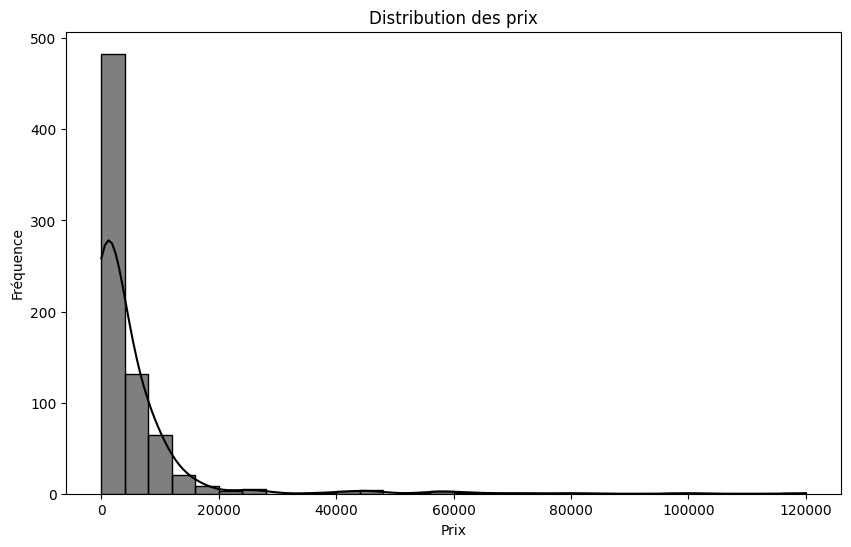

In [43]:
# 2. Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30, color='black')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

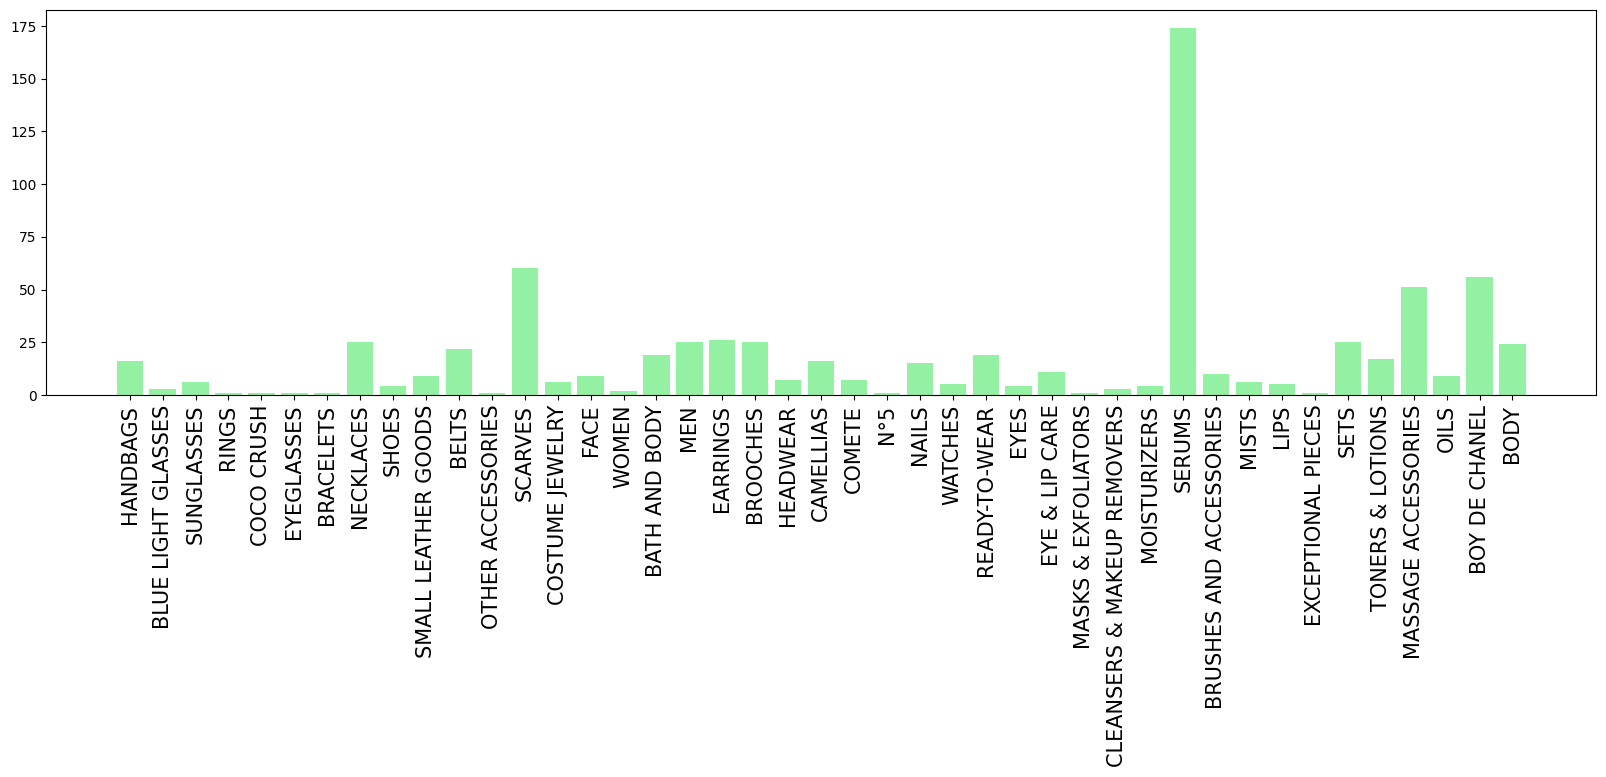

In [44]:
import numpy as np

plt.figure(figsize=(20,5))
item, count = np.unique(data['category2_code'], return_counts=True)
names = data.category2_code.unique()
y_pos = np.arange(len(names))
plt.bar(item, count, alpha=0.6, color = (0.3,0.9,0.4,0.6) )

plt.xticks(y_pos, names, fontsize=15, rotation=90)

plt.show()

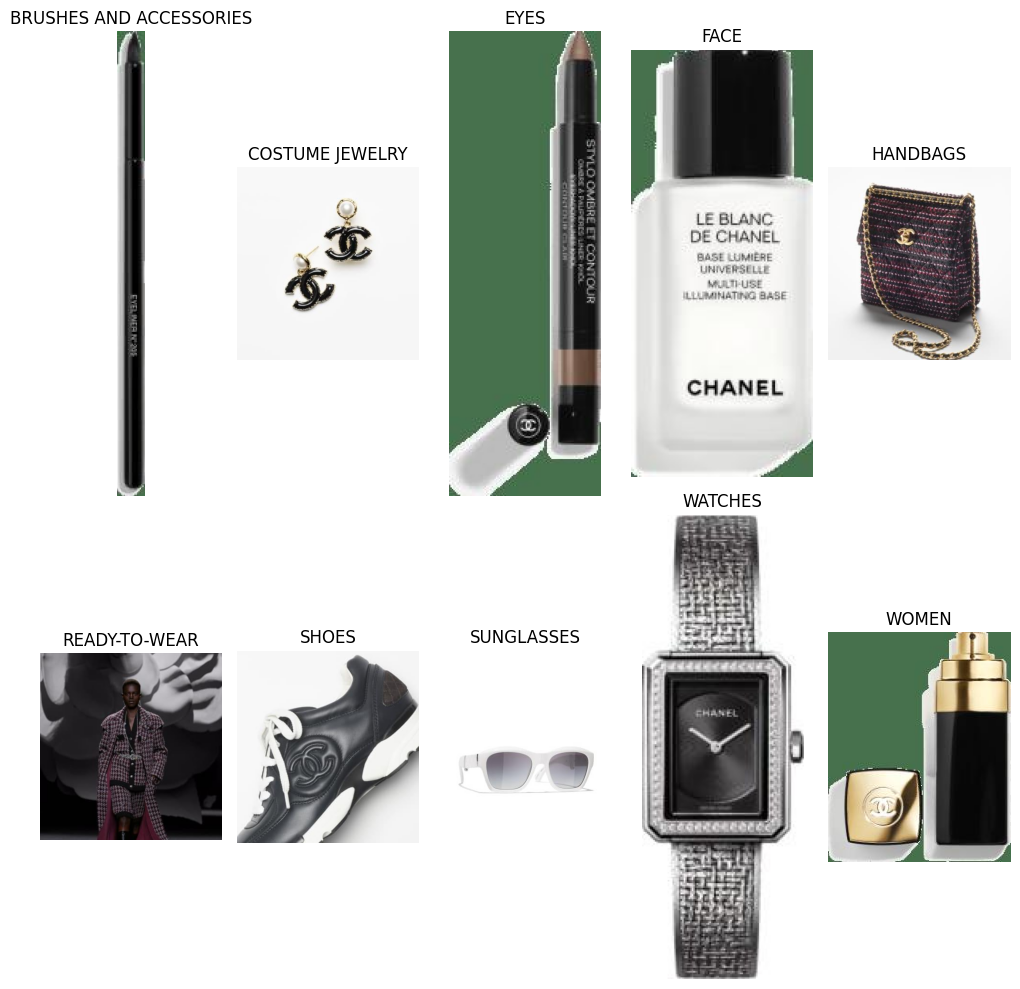

In [45]:
fig= plt.figure(figsize=(10,10))
item, count = np.unique(data['category2_code'], return_counts=True)
category_counts = pd.DataFrame({'category2_code': item, 'count': count})
category_counts = category_counts.sort_values('count',ascending=False)
i=0
for folder in folders:
  if folder in category_counts.category2_code.head(10).values:
    ax = fig.add_subplot(2, 5, i+1)  
    ax.axis('off')
    
    category_dir = os.path.join(base_dir, folder)
    file= [f for f in os.listdir(category_dir)][0]
    img = Image.open(f'{category_dir}/{file}')
    ax.imshow(img)
    ax.set_title(f"{folder}")  
    i+=1


plt.tight_layout()
plt.show()


In [46]:
import os

path_output= '../Data/data_augmentation'

#dans ce code il fallait nettoyer les noms des fichiers pour ne pas avoir un probleme
# lorsque on on entraine le model vision Transformer 
def clean_filenames(directory):
    for root, dirs, files in os.walk(directory):
        for name in dirs + files:
            clean_name = name.strip().replace(' ', '_').replace('-', '_').replace('°', '_').replace('&', '_')
            clean_path = os.path.join(root, clean_name)
            original_path = os.path.join(root, name)
            if original_path != clean_path:
                os.rename(original_path, clean_path)


clean_filenames(path_output)
